In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

In [22]:
df1 =pd.read_csv('./../data/daily_price/kospi/000270_dailyprice.csv')
df2 =pd.read_csv('./../data/daily_price/kospi/068270_dailyprice.csv')

In [26]:
def previous_price(df):
    df['날짜'] = df['날짜'].apply(lambda x: pd.to_datetime(str(x)))
    idx = np.where((df['날짜']>=datetime.datetime(2017, 12, 1))&(df['날짜']<=datetime.datetime(2022, 11, 30)))
    df = df[np.min(idx):np.max(idx)+1]
    df.reset_index(drop=True,inplace=True)
    df['전일비_비율'] = df['전일비_비율'].apply(lambda x : x.replace('%','')).astype(float)

    return df

In [28]:
df1 = previous_price(df1)
df2 = previous_price(df2)

C:\Users\seon\AppData\Local\Temp\ipykernel_29464\1136514585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['전일비_비율'] = df['전일비_비율'].apply(lambda x : x.replace('%','')).astype(float)


Text(0.5, 1.0, 'celltrion')

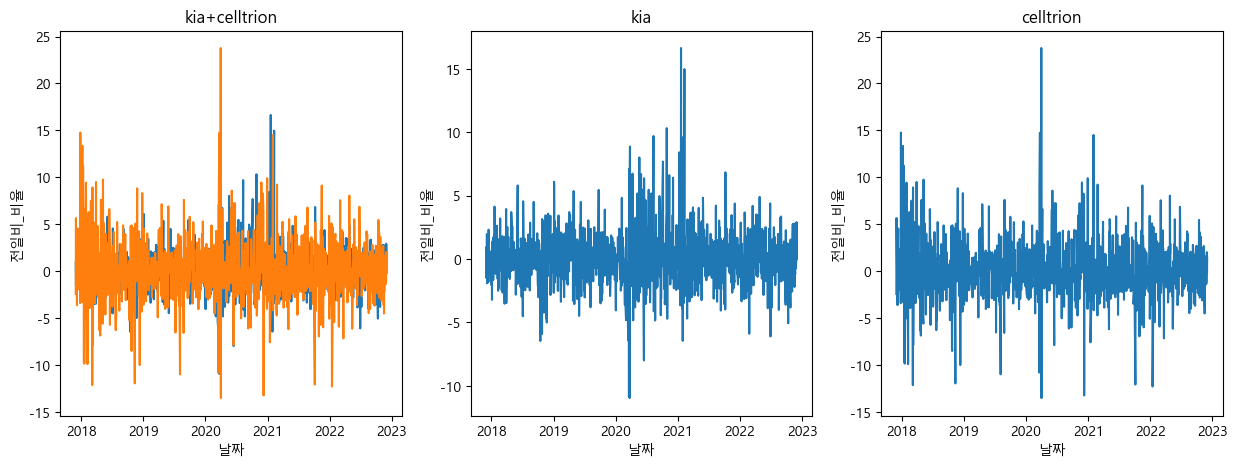

In [28]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.lineplot(data=df1,x='날짜',y='전일비_비율',ax=ax1)
sns.lineplot(data=df2,x='날짜',y='전일비_비율',ax=ax1)
sns.lineplot(data=df1,x='날짜',y='전일비_비율',ax=ax2)
sns.lineplot(data=df2,x='날짜',y='전일비_비율',ax=ax3)

ax1.set_title('kia+celltrion')
ax2.set_title('kia')
ax3.set_title('celltrion')

Text(0.5, 1.0, 'celltrion')

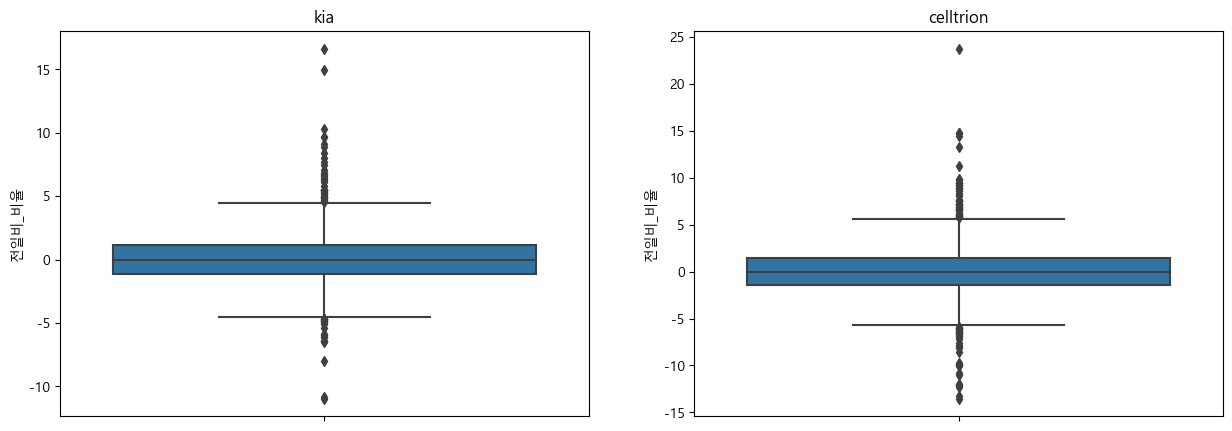

In [29]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(data=df1,y='전일비_비율',ax=ax1)
sns.boxplot(data=df2,y='전일비_비율',ax=ax2)

ax1.set_title('kia')
ax2.set_title('celltrion')

In [30]:
print('kia Q1:', np.percentile(df1['전일비_비율'], 1))

kia Q1: -4.9604


In [32]:
print('kia Q1:', np.percentile(df1['전일비_비율'], 25))
print('kia Q2:',np.percentile(df1['전일비_비율'], 50))
print('kia Q3:',np.percentile(df1['전일비_비율'], 75))

kia Q1: -1.14
kia Q2: 0.0
kia Q3: 1.13


In [33]:
print('celltrion Q1:', np.percentile(df2['전일비_비율'], 25))
print('celltrion Q2:',np.percentile(df2['전일비_비율'], 50))
print('celltrion Q3:',np.percentile(df2['전일비_비율'], 75))

celltrion Q1: -1.46
celltrion Q2: 0.0
celltrion Q3: 1.42


In [35]:
df1.loc[df1['전일비_비율']==-0]

,날짜,종가,전일비,시가,고가,저가,거래량,전일비_비율
37,2018-01-25,33900,0,33900,34200,33400,923134,0.0
96,2018-04-23,31350,0,31250,31400,31050,624642,0.0
162,2018-07-31,31700,0,31800,31950,31500,636196,0.0
195,2018-09-17,34050,0,34050,34350,33950,530408,0.0
249,2018-12-07,30950,0,31000,31100,30350,657527,0.0
258,2018-12-20,33800,0,33400,34200,32950,780680,0.0
290,2019-02-12,37000,0,37150,37300,36800,1150518,0.0
298,2019-02-22,35600,0,35750,35900,35300,428309,0.0
314,2019-03-19,34700,0,34450,34900,34000,681154,0.0
344,2019-04-30,45250,0,45350,46300,44600,2337864,0.0


코스닥 2개

In [30]:
df3 =pd.read_csv('./../data/daily_price/kosdaq/112040_dailyprice.csv')
df4 =pd.read_csv('./../data/daily_price/kosdaq/035760_dailyprice.csv')

In [31]:
df3 = previous_price(df3)
df4 = previous_price(df4)

C:\Users\seon\AppData\Local\Temp\ipykernel_29464\1136514585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['전일비_비율'] = df['전일비_비율'].apply(lambda x : x.replace('%','')).astype(float)


Text(0.5, 1.0, 'cj enm')

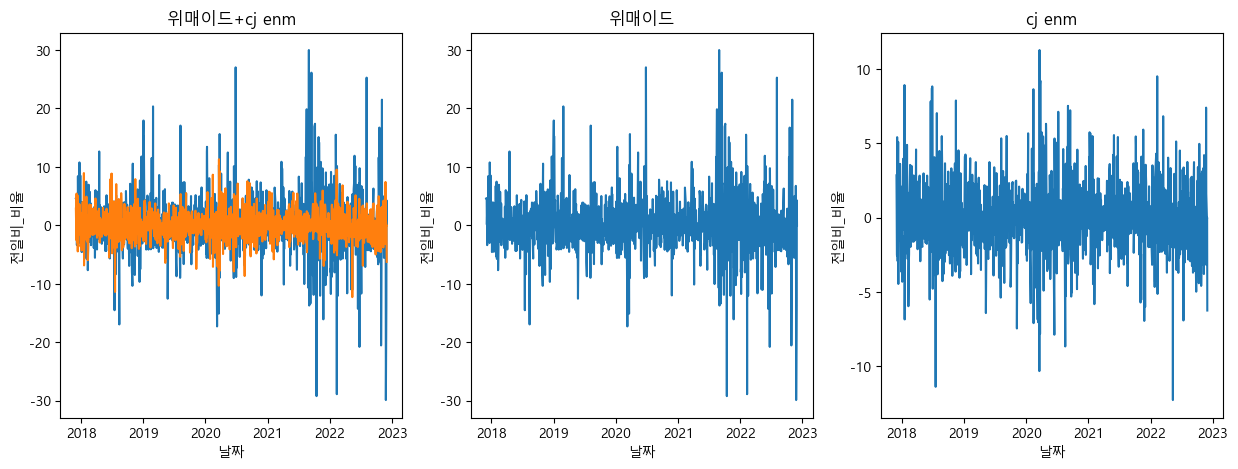

In [32]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.lineplot(data=df3,x='날짜',y='전일비_비율',ax=ax1)
sns.lineplot(data=df4,x='날짜',y='전일비_비율',ax=ax1)
sns.lineplot(data=df3,x='날짜',y='전일비_비율',ax=ax2)
sns.lineplot(data=df4,x='날짜',y='전일비_비율',ax=ax3)

ax1.set_title('위매이드+cj enm')
ax2.set_title('위매이드')
ax3.set_title('cj enm')

Text(0.5, 1.0, 'cj enm')

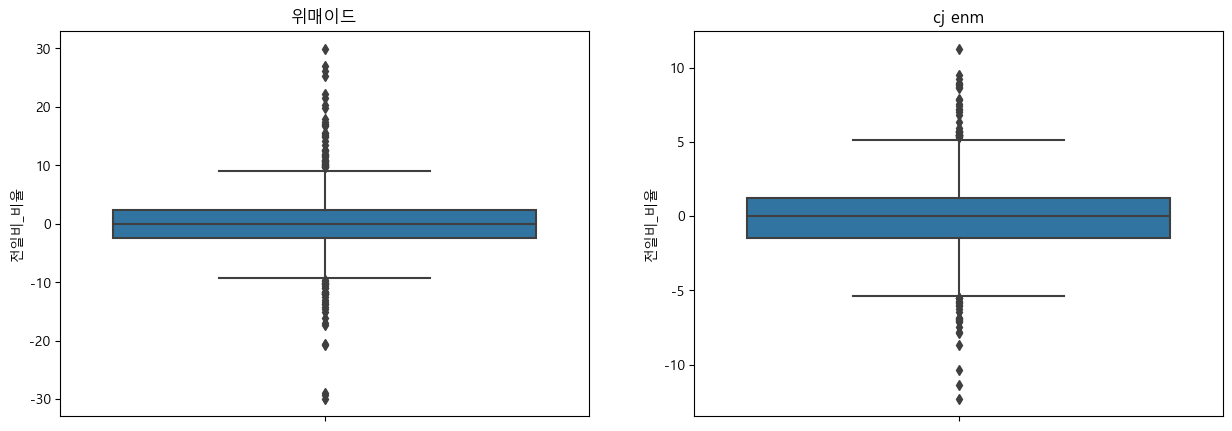

In [33]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(data=df3,y='전일비_비율',ax=ax1)
sns.boxplot(data=df4,y='전일비_비율',ax=ax2)

ax1.set_title('위매이드')
ax2.set_title('cj enm')

In [34]:
print('위매이드 Q1:', np.percentile(df3['전일비_비율'], 10))

위매이드 Q1: -4.383


In [35]:
print('위매이드 Q1:', np.percentile(df3['전일비_비율'], 25))
print('위매이드 Q2:',np.percentile(df3['전일비_비율'], 50))
print('위매이드 Q3:',np.percentile(df3['전일비_비율'], 75))

위매이드 Q1: -2.3375
위매이드 Q2: -0.09
위매이드 Q3: 2.305


In [36]:
print('cj Q1:', np.percentile(df4['전일비_비율'], 25))
print('cj Q2:',np.percentile(df4['전일비_비율'], 50))
print('cj Q3:',np.percentile(df4['전일비_비율'], 75))

cj Q1: -1.4675
cj Q2: 0.0
cj Q3: 1.21


In [39]:
def iqr_outlier(df):
    Q1 = np.percentile(df['전일비_비율'],25)
    Q2 = np.percentile(df['전일비_비율'],50)
    Q3 = np.percentile(df['전일비_비율'],75)

    IQR = Q3 - Q1

    IQR_df = df[(df['전일비_비율'] <= Q3 + IQR*1.5) & (df['전일비_비율'] >= Q1 - IQR*1.5)]

    return IQR_df

In [40]:
iqr_outlier(df3)

,날짜,종가,전일비,시가,고가,저가,거래량,전일비_비율
0,2017-12-01,38700,1700,37000,39400,36000,169383,4.59
1,2017-12-04,40500,1800,38700,41000,38550,251061,4.65
2,2017-12-05,40550,50,40600,40600,39250,122559,0.12
3,2017-12-06,41150,600,40100,41150,39450,154770,1.48
4,2017-12-07,39750,-1400,41150,41500,38600,136068,-3.40
...,...,...,...,...,...,...,...,...
1223,2022-11-22,53400,-200,53600,54800,52400,357622,-0.37
1224,2022-11-23,57000,3600,54700,57400,54100,669474,6.74
1225,2022-11-24,56200,-800,57700,59900,54000,1788315,-1.40
1228,2022-11-29,35450,1450,33350,36200,33100,4970270,4.26


Text(0.5, 1.0, 'cj enm')

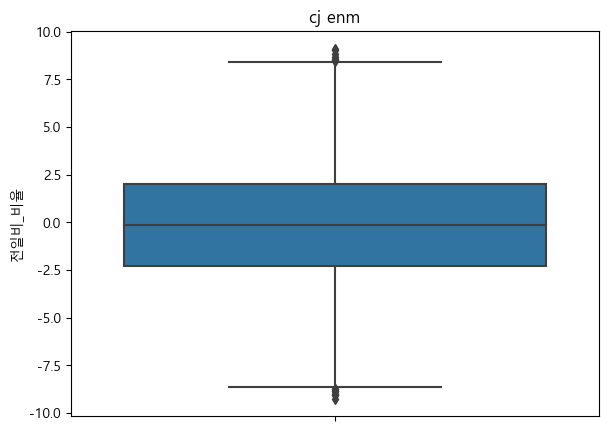

In [41]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)

sns.boxplot(data=iqr_outlier(df3),y='전일비_비율',ax=ax1)

ax1.set_title('cj enm')

In [42]:
print('cj_iqr Q1:', np.percentile(iqr_outlier(df3)['전일비_비율'], 25))
print('cj_iqr Q2:',np.percentile(iqr_outlier(df3)['전일비_비율'], 50))
print('cj_iqr Q3:',np.percentile(iqr_outlier(df3)['전일비_비율'], 75))

cj_iqr Q1: -2.2675
cj_iqr Q2: -0.12
cj_iqr Q3: 2.01
